# Proyecto Titanic

### El objetivo de este proyecto es predecir correctamente si alguién sobrevivió al naufragio del Titanic 

## Indice General

### 1. Entendiendo la forma de los datos (Histogramas, boxplot, etc)
### 2. Limpieza de datos
### 3. Ingeniería de features
### 4. Procesamiento de datos para el modelo
### 5. Construyendo un modelo básico
### 6. Ajustando el modelo
### 7. Construcción de modeos de conjuntos

In [1]:
# Importamos librerías necesarias

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [2]:
training = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

# Añadimos una columna más a cada dataset, llamada'train_test' cuyos valores 1 para entrenamiento 0 para pruebas  
training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
# Concatenamos ambos datasets
all_data = pd.concat([training, test])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

### Planificando el proyecto

A continuación se muestra el esquema aproximado que se creó para este proyecto.

- Entendiendo la naturaleza de los datos
- Histograma y boxplot
- CountValues
- Datos Faltantes
- Correlación entre métricas
- Métricas
- Exploración de temas interesantes
  - ¿Los ricos sobreviven?
  - Por localidad
  - Scatterplot de Age vs Ticket Price
  - Variable jovén y rico
  - Gasto total
- Ingeniería de características
- Preprocesar juntos los datos o usar una transformada
  - Usar etiquetas para entrenamiento y test
- Escaland0

### Exploración ligera de datos

1. Para datos numéricos
- Crear histogramas para entender las distribuciones

2. Para datos categóricos
- Crear bar charts para entender el balance de las clases
- Crear pivot tables para entender relaciones entre los sobrevivientes

In [3]:
# Un vistazo rápido de nuestros tipos de datos y conteos nulos
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [4]:
# Para un mejor entendimiento de los datos numéricos, usarremos el método describe(). 
#Este nos da un entendimiento de las medidas de tendecia central dem los datos
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [5]:
# Una manera rápida de separar columnas numéricas
training.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [6]:
# Observemos los valores numericos y categoricos por separado
df_num = training[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = training[['Survived',  'Pclass', 'Sex', 'Ticket', 'Cabin','Embarked']]

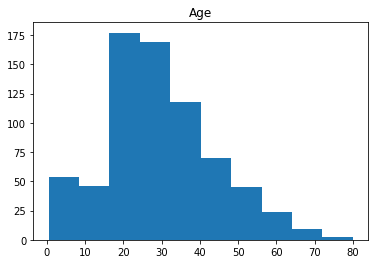

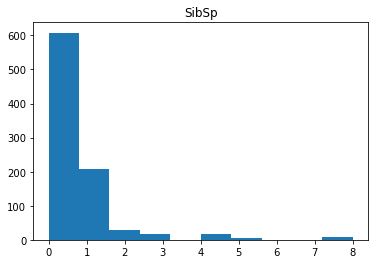

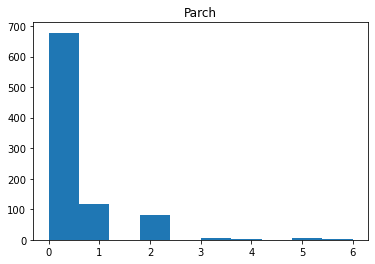

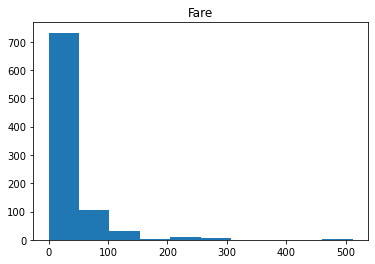

In [7]:
# Distribuciones para todas las variables numéricas
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

Quiza deberíamos las distribuciones asimétricas es decir la que no son normales y considerar normalizarlas.

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

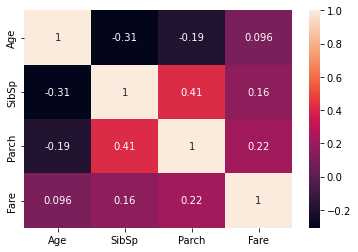

In [8]:
print(df_num.corr())
sns.heatmap(df_num.corr(), cbar=True,annot=True,yticklabels= df_num.columns , 
            xticklabels=df_num.columns)

In [9]:
# Comparamos la tasa de sobrevivencia a través deAge, SibSp, Parch, y Fare 
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'], aggfunc = 'mean' )

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


Veamos el numero de sobrevivientes y no sobrevivientes de nuestro set de entrenamiento

In [10]:
survived = df_cat['Survived'].value_counts()[1]
no_survided = df_cat['Survived'].value_counts()[0]

print(f"Número de sobrevivientes: {survived}")
print(f"Número de NO sobrevivientes: {no_survided}\n")
print(f"Total: {survived + no_survided}")


Número de sobrevivientes: 342
Número de NO sobrevivientes: 549

Total: 891


Mediante un count plot que es un diagrama de conteo o frecuencia para una variable categórica, vamos a captar de manera visual la cantidad de personas por: sobrevivencia, clases, sexo, ticket, cabina y embarque 

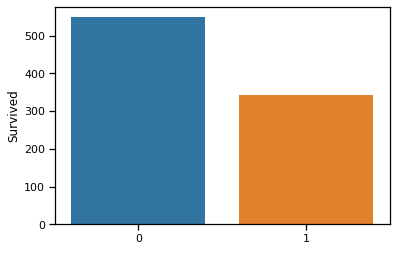

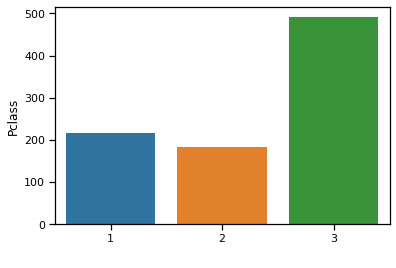

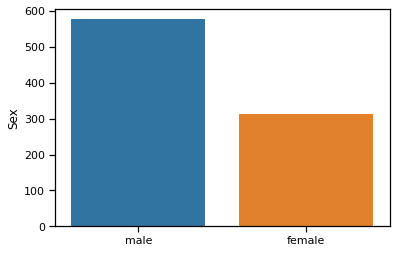

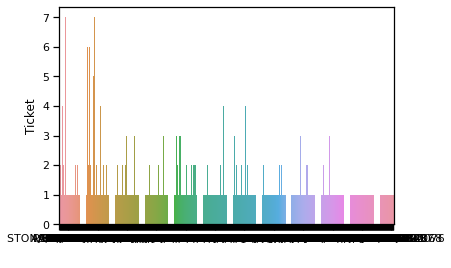

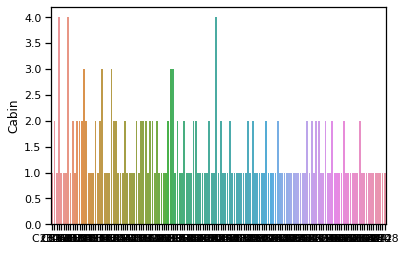

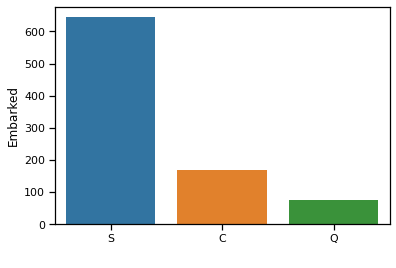

In [11]:
sns.set_context('notebook')
for i in df_cat.columns:
    g = sns.countplot(x = i , data = df_cat)
    #g.set_title(i)
    g.set(xlabel = ' ', ylabel = i)
    
    plt.show()

Los gráficos de cabina y ticket son muy desordenados, debido a que presentan bastantes diferentes elementos. No es como or ejemplo sexo donde existen dos elementos masculino o femenino sino muchos elementos.

Ahora comparamos los sobrevivientes con cada una de estas variables categóricas

In [12]:
# La variable ticket en este caso me sirve como variable de apoyo para el conteo. dado cada que sus elementos son unicos
pclass_table = pd.pivot_table(training, index = 'Survived', values = 'Ticket',  columns = ['Pclass', 'Sex'], aggfunc = 'count')
sex_table = pd.pivot_table(training, index = 'Survived', values = 'Ticket',  columns = 'Sex', aggfunc = 'count')
embarked_table = pd.pivot_table(training, index = 'Survived', values = 'Ticket',  columns = 'Embarked', aggfunc = 'count')

print(f'{pclass_table}\n')
print(f'{sex_table}\n')
print(f'{embarked_table}')

Pclass        1           2           3     
Sex      female male female male female male
Survived                                    
0             3   77      6   91     72  300
1            91   45     70   17     72   47

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


Se observa en las tablas que estar en clase alta y ser mujer aumentaba tu probabilidad de sobrevivir enormemente

## Ingeniería de Características

1. Cabin: Simplicar las cabinas, evaluando si la letra de la cabina (cabina_adv) o la compra de boletos en varias cabinas (cabin_multiple), afectó la supervivencia

2. Tickets: Analizar si los diferentes tipos de tickets impactan en la tasa de supervivencia

3. Ver si el título de una persona se relacion con la tasa de supervivencia

In [13]:
df_cat['Cabin']

# A la columna Vamos añadir cero si presenta un valor NaN y si presenta un string, lo convertiremos a una lista, 
# y estraemos su longitud. Cada lista queda definida por elementos del string separados por el 'espacio'
training['cabin_multiple'] = training['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

# Después de ver esto, pdemos mirar a 'Cabin' por letra o por número. Creamos algunas categorías para esta letra
training['cabin_multiple'].value_counts()
#training['cabin_multiple'].sample(50)

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [14]:
'ho la'.split(' ')

['ho', 'la']

In [15]:
pd.pivot_table(training, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket', aggfunc = 'count', fill_value = 0)

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481,58,7,3,0
1,206,122,9,3,2


In [16]:
# Creamos categorías basadas en la letra de cabina (n significa nulo)
# En este caso trataremos a los valores nulos como una categoría más

training['cabin_adv'] = training['Cabin'].apply(lambda x: str(x)[0])

In [17]:
training['cabin_adv']

0      n
1      C
2      n
3      C
4      n
      ..
886    n
887    B
888    n
889    C
890    n
Name: cabin_adv, Length: 891, dtype: object

In [18]:
# Comparamos tasa de supervivientes por cabina. 
print(training['cabin_adv'].value_counts())
pd.pivot_table(training, index = 'Survived', columns='cabin_adv', values = 'Name', aggfunc = 'count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


La mayoría de valores son nulos y están reprsentados con n. 

In [19]:
# Entendiendo mejor los valores de los ticket
# numéricos vs no numéricos

training['numeric_ticket'] = training['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)

training['tickets_letters'] = training['Ticket'].apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.', '').replace
                                                              ('/', '').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [20]:
x = '/El CENTRO. de todo. es Jesus/'
r = x.split(' ')[:-1] #corto al estring por cada 'espacio' pero la convierte en lista
r= ''.join(r) # vuelvo a unir lista ya sin el espacio pero la convierto en string
r = r.replace('.', '') #reemplazo caracteres replace('viejo', 'nuevo')
r = r.replace('/', '') 
r = r.lower() # convierto todo a minucula
r

'elcentrodetodoes'

In [21]:
training[['Ticket', 'tickets_letters', 'numeric_ticket']].sample(20)

,Ticket,tickets_letters,numeric_ticket
635,237668,0,1
257,110152,0,1
347,386525,0,1
780,2687,0,1
386,CA 2144,ca,0
878,349217,0,1
633,112052,0,1
426,2003,0,1
67,S.P. 3464,sp,0
787,382652,0,1


In [22]:
training['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [23]:
# Veamos todas las filas en el dataframe a través del desplazamiento, eso por conveniencia
pd.set_option("max_rows", None)
training['tickets_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: tickets_letters, dtype: int64

In [24]:
# diferencia entre tickets numericos y no numericos en la tasa de supervivencia
pd.pivot_table(training, index = 'Survived', columns = ['Pclass', 'numeric_ticket'], values = 'Ticket', aggfunc = 'count')

Pclass           1       2       3     
numeric_ticket   0   1   0   1   0    1
Survived                               
0               24  56  31  66  87  285
1               40  96  26  61  22   97

In [25]:
# Tasa de supervivencia a través de los diferentes tipos de ticket
pd.pivot_table(training, index = 'Survived',  columns = 'tickets_letters', values= 'Ticket', aggfunc = 'count' )

tickets_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [26]:
# INgenriería de caracteristicas sobre el título de la persona
training['Name'].head(50)
training['name_title'] = training['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
# mr,ms,master,etc

In [27]:
a  = 'richard, Ing. Sailema Medina'
a = a.split(',')[1]
a = a.split('.')[0]
a = a.strip() # quita los espacios por sangría
a

'Ing'

In [28]:
training['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

### Procesando datos para el modelo

1) Eliminar valores nulos de la columna Enbarked 

2) Incluimos variales solamente relevantes (Ya que hemos limitado datos, se puede excluir cosas como 'Name' y 'passengerId' de modo que podríamos tener un número razonable de features para nuestros modelos)

Features: 'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title'

3) Realizar transformaciones categoricas sobre todos los datos. Usualmente se usaría un transformador, pero con este enfoque podemos asegurarnos que nuestro dataset de entrenamiento y pruebas tengan las mismas pregutas. También debemos ser capaces de inferir algo sobre la forma de los datos de prueba a través de este  método. 

4) Imputar datos con media para 'fare' y 'age'.(Se debería también con la mediana).

5) NOrmalizar 'fare' usando logarithm para dar más apariencia de una distribución normal.

6) Escalar datos entre 0 y 1 con un objeto Standard escaler

(889,)

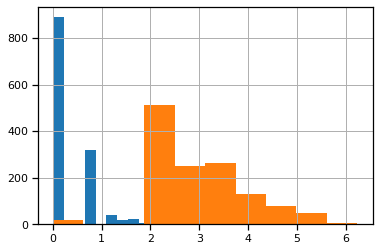

In [29]:
# Crear todas las variables categoricas que tratamos arriba para el set de entranamiento y test
all_data['cabin_multiple'] = all_data['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data['Cabin'].apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data['Ticket'].apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.', '').replace
                                                              ('/', '').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Imputamos null para datos continuos
all_data['Age'] = all_data['Age'].fillna(training['Age'].mean())
all_data['Fare'] = all_data['Fare'].fillna(training['Fare'].mean())

# eliminamos filas nulas de 'Embarked', solamente 2 instancias de esto entrenamiento y 0 en prueba
all_data.dropna(subset = ['Embarked'], inplace = True)

# Apliacmos la norma log a 'sibsp'
all_data['norm_sibsp'] = np.log(all_data['SibSp']+1)
all_data['norm_sibsp'].hist()

# Aplicamos la norma log de 'Fare'
all_data['norm_fare'] = np.log(all_data['Fare']+1)
all_data['norm_fare'].hist()

# Convertimos 'Fare' a categoría con pd.get_dummies()
all_data['Pclass'] = all_data['Pclass'].astype(str)
    
# Creamos variables dummies de categorías (también podemos usar OneHotEncoder)
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv',
                                        'cabin_multiple','numeric_ticket','name_title','train_test']])

# Dividimos el  set de entreanmiento y pruebas otra vez
X_train = all_dummies[all_dummies['train_test'] == 1].drop(['train_test'], axis = 1)
X_test = all_dummies[all_dummies['train_test'] == 0].drop(['train_test'], axis = 1)    

y_train = all_data[all_data['train_test']==1]['Survived']
y_train.shape

En la figura se puede ver una mejora de la districión de 'Fare' tras haber sido normalizada con log. Antes: gráfica azul, después: gráfica naranja

In [30]:
# Escalando datos:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']] = scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled['train_test']==1].drop(['train_test'], axis=1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled['train_test']==0].drop(['train_test'], axis=1)

y_train = all_data[all_data['train_test']==1]['Survived']

### Construcción del Modelo (Rendimiento de validación de referencia)

Antes de profundizar. Sería bueno ver diferentes modelos realizados con parámetros predeterminados. Vamos a probar los siguentes modelos con una validación cruzada de 5 veces para obtener una referencia. Con una validación establecida de referencia, podemos ver cuánto mejora el ajuste en cada uno de los modelos. Solo porque un modelo tiene una alta referencia sobre el conjunto de validación no quiere decir que en realidad funcionará mejor en el conjunto final prueba,  'test set'

* Naive Bayes (72.6%)
* Logistic Regression (82.1%)
* Decision Tree (77.6%)
* K Nearest Neighbor (80.5%)
* Random Forest (80.6%)
* Support Vector Classifier (83.2%)
* Xtreme Gradient Boosting (81.8%)
* Soft Voting Classifier - All Models (82.8%)

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [32]:
# Usando naive-bayes como una referencia para la tareas de clasificación
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


Regresión Logística

In [33]:
lr = LogisticRegression(max_iter=2000)
cv = cross_val_score(lr, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.82022472 0.80898876 0.80337079 0.82022472 0.85310734]
0.8211832666793626


In [34]:
lr = LogisticRegression(max_iter=2000)
cv = cross_val_score(lr, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.82022472 0.80898876 0.80337079 0.82022472 0.85310734]
0.8211832666793626


Arbol de desición

In [35]:
dt = tree.DecisionTreeClassifier(random_state=1)
cv = cross_val_score(dt, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.74719101 0.74157303 0.80898876 0.75842697 0.82485876]
0.776207706468609


In [36]:
dt = tree.DecisionTreeClassifier(random_state=1)
cv = cross_val_score(dt, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.74719101 0.74157303 0.80898876 0.75280899 0.81920904]
0.7739541674601662


K Nearest Neighbor 

In [37]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.76966292 0.80898876 0.80337079 0.81460674 0.83615819]
0.8065574811147084


In [38]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.79775281 0.79213483 0.83146067 0.80337079 0.85310734]
0.8155652891512728


Bosque Aleatorio

In [39]:
rf = RandomForestClassifier(random_state=1)
cv = cross_val_score(rf, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.82022472 0.78651685 0.85393258 0.73033708 0.84180791]
0.8065638291119152


In [40]:
rf = RandomForestClassifier(random_state=1)
cv = cross_val_score(rf, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.81460674 0.78651685 0.85393258 0.73033708 0.84180791]
0.8054402336062972


Support Vector Classifier (SVC)

In [41]:
svc = SVC(probability=True)
cv = cross_val_score(svc, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.68539326 0.76966292 0.71348315 0.71910112 0.74011299]
0.7255506887576969


In [42]:
svc = SVC(probability=True)
cv = cross_val_score(svc, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.84831461 0.82022472 0.8258427  0.80337079 0.86440678]
0.8324319177299563


In [43]:
xgb = XGBClassifier(random_state=1)
cv = cross_val_score(svc, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.84831461 0.82022472 0.8258427  0.80337079 0.86440678]
0.8324319177299563


El clasificador de votación toma todas las entradas y promedia los resultados. Para un clasificador de votación 'difícil' cada clasificador obtiene un voto 'Ýes' o 'No' y el resultado es solo un voto popular. Para esto, tu generalmente quieres números impares.

Un clasificador 'suave' promedia  la confianza de cada uno de los modelos. Si la confianza promedio es > 50%, de que es 1, se contará como tal.

In [44]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),
                                            ('xgb',xgb)], voting = 'soft')

In [46]:
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

/home/richard/anaconda3/envs/datascience/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:51:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/richard/anaconda3/envs/datascience/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:51:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/richard/anaconda3/envs/datascience/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:51:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/richard/anaconda3/envs/datascience/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:51:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:51:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.83146067 0.81460674 0.83146067 0.80337079 0.85875706]
0.8279311877102774


/home/richard/anaconda3/envs/datascience/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [48]:
voting_clf.fit(X_train_scaled, y_train)
y_hat_base_cv = voting_clf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': test['PassengerId'], 'Survived': y_hat_base_cv}
basic_submission = pd.DataFrame(data = basic_submission)
basic_submission.to_csv('base_submission', index = False)


/home/richard/anaconda3/envs/datascience/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:57:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [88]:
df_r = training
import sklearn.preprocessing as preprocessing
encoder =  preprocessing.OneHotEncoder(handle_unknown='ignore')
encoder.fit(df_r[['Pclass']].values)

encoder.transform([[1],[2],[3]]).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [80]:
matriz = np.array([1,2,3,4,5,6,7,8,])
matriz = matriz.reshape(1,-1)
matriz

array([[1, 2, 3, 4, 5, 6, 7, 8]])

In [89]:
pd.get_dummies(df_r['Pclass'])

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,0,1
6,1,0,0
7,0,0,1
8,0,0,1
9,0,1,0
